In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Project Task: Week 1

#### Data Import and Preparation:

###### 1) Import data. 

In [3]:
test=pd.read_csv("test.csv")

In [4]:
train=pd.read_csv("train.csv")

In [5]:
test.shape

(11709, 80)

In [6]:
train.shape

(27321, 80)

In [7]:
test.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
0  255504      NaN       140       163       26      Michigan       MI   
1  252676      NaN       140         1       23         Maine       ME   
2  276314      NaN       140        15       42  Pennsylvania       PA   
3  248614      NaN       140       231       21      Kentucky       KY   
4  286865      NaN       140       355       48         Texas       TX   

             city                  place     type  ... female_age_mean  \
0         Detroit  Dearborn Heights City      CDP  ...        34.78682   
1          Auburn            Auburn City     City  ...        44.23451   
2       Pine City              Millerton  Borough  ...        41.62426   
3      Monticello        Monticello City     City  ...        44.81200   
4  Corpus Christi                  Edroy     Town  ...        40.66618   

   female_age_median  female_age_stdev  female_age_sample_weight  \
0           33.75000          21.58531                 416.48097   
1           46.66667          22.37036                 532.03505   
2           44.50000          22.86213                 453.11959   
3           48.00000          21.03155                 263.94320   
4           42.66667          21.30900                 709.90829   

   female_age_samples  pct_own  married  married_snp  separated  divorced  
0              1938.0  0.70252  0.28217      0.05910    0.03813   0.14299  
1              1950.0  0.85128  0.64221      0.02338    0.00000   0.13377  
2              1879.0  0.81897  0.59961      0.01746    0.01358   0.10026  
3              1081.0  0.84609  0.56953      0.05492    0.04694   0.12489  
4              2956.0  0.79077  0.57620      0.01726    0.00588   0.16379  

[5 rows x 80 columns]

In [8]:
train.head()

UID  BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
0  267822      NaN       140        53       36     New York       NY   
1  246444      NaN       140       141       18      Indiana       IN   
2  245683      NaN       140        63       18      Indiana       IN   
3  279653      NaN       140       127       72  Puerto Rico       PR   
4  247218      NaN       140       161       20       Kansas       KS   

         city           place   type  ... female_age_mean  female_age_median  \
0    Hamilton        Hamilton   City  ...        44.48629           45.33333   
1  South Bend        Roseland   City  ...        36.48391           37.58333   
2    Danville        Danville   City  ...        42.15810           42.83333   
3    San Juan        Guaynabo  Urban  ...        47.77526           50.58333   
4   Manhattan  Manhattan City   City  ...        24.17693           21.58333   

   female_age_stdev  female_age_sample_weight  female_age_samples  pct_own  \
0          22.51276                 685.33845              2618.0  0.79046   
1          23.43353                 267.23367              1284.0  0.52483   
2          23.94119                 707.01963              3238.0  0.85331   
3          24.32015                 362.20193              1559.0  0.65037   
4          11.10484                1854.48652              3051.0  0.13046   

   married  married_snp  separated  divorced  
0  0.57851      0.01882    0.01240   0.08770  
1  0.34886      0.01426    0.01426   0.09030  
2  0.64745      0.02830    0.01607   0.10657  
3  0.47257      0.02021    0.02021   0.10106  
4  0.12356      0.00000    0.00000   0.03109  

[5 rows x 80 columns]

In [9]:
train.columns 

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [10]:
train.describe()

UID  BLOCKID  SUMLEVEL      COUNTYID       STATEID  \
count   27321.000000      0.0   27321.0  27321.000000  27321.000000   
mean   257331.996303      NaN     140.0     85.646426     28.271806   
std     21343.859725      NaN       0.0     98.333097     16.392846   
min    220342.000000      NaN     140.0      1.000000      1.000000   
25%    238816.000000      NaN     140.0     29.000000     13.000000   
50%    257220.000000      NaN     140.0     63.000000     28.000000   
75%    275818.000000      NaN     140.0    109.000000     42.000000   
max    294334.000000      NaN     140.0    840.000000     72.000000   

           zip_code     area_code           lat           lng         ALand  \
count  27321.000000  27321.000000  27321.000000  27321.000000  2.732100e+04   
mean   50081.999524    596.507668     37.508813    -91.288394  1.295106e+08   
std    29558.115660    232.497482      5.588268     16.343816  1.275531e+09   
min      602.000000    201.000000     17.929085   -165.453872  4.113400e+04   
25%    26554.000000    405.000000     33.899064    -97.816067  1.799408e+06   
50%    47715.000000    614.000000     38.755183    -86.554374  4.866940e+06   
75%    77093.000000    801.000000     41.380606    -79.782503  3.359820e+07   
max    99925.000000    989.000000     67.074017    -65.379332  1.039510e+11   

       ...  female_age_mean  female_age_median  female_age_stdev  \
count  ...     27115.000000       27115.000000      27115.000000   
mean   ...        40.319803          40.355099         22.178745   
std    ...         5.886317           8.039585          2.540257   
min    ...        16.008330          13.250000          0.556780   
25%    ...        36.892050          34.916670         21.312135   
50%    ...        40.373320          40.583330         22.514410   
75%    ...        43.567120          45.416670         23.575260   
max    ...        79.837390          82.250000         30.241270   

       female_age_sample_weight  female_age_samples       pct_own  \
count              27115.000000        27115.000000  27053.000000   
mean                 544.238432         2208.761903      0.640434   
std                  283.546896         1089.316999      0.226640   
min                    0.664700            2.000000      0.000000   
25%                  355.995825         1471.000000      0.502780   
50%                  503.643890         2066.000000      0.690840   
75%                  680.275055         2772.000000      0.817460   
max                 6197.995200        27250.000000      1.000000   

            married   married_snp     separated      divorced  
count  27130.000000  27130.000000  27130.000000  27130.000000  
mean       0.508300      0.047537      0.019089      0.100248  
std        0.136860      0.037640      0.020796      0.049055  
min        0.000000      0.000000      0.000000      0.000000  
25%        0.425102      0.020810      0.004530      0.065800  
50%        0.526665      0.038840      0.013460      0.095205  
75%        0.605760      0.065100      0.027488      0.129000  
max        1.000000      0.714290      0.714290      1.000000  

[8 rows x 74 columns]

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27321 entries, 0 to 27320
Data columns (total 80 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   UID                          27321 non-null  int64  
 1   BLOCKID                      0 non-null      float64
 2   SUMLEVEL                     27321 non-null  int64  
 3   COUNTYID                     27321 non-null  int64  
 4   STATEID                      27321 non-null  int64  
 5   state                        27321 non-null  object 
 6   state_ab                     27321 non-null  object 
 7   city                         27321 non-null  object 
 8   place                        27321 non-null  object 
 9   type                         27321 non-null  object 
 10  primary                      27321 non-null  object 
 11  zip_code                     27321 non-null  int64  
 12  area_code                    27321 non-null  int64  
 13  lat             

###### 2) Figure out the primary key and look for the requirement of indexing.

In [12]:
train.set_index(keys=['UID'],inplace=True)

In [13]:
test.set_index(keys=['UID'],inplace=True)

In [14]:
train.head()

BLOCKID  SUMLEVEL  COUNTYID  STATEID        state state_ab  \
UID                                                                  
267822      NaN       140        53       36     New York       NY   
246444      NaN       140       141       18      Indiana       IN   
245683      NaN       140        63       18      Indiana       IN   
279653      NaN       140       127       72  Puerto Rico       PR   
247218      NaN       140       161       20       Kansas       KS   

              city           place   type primary  ...  female_age_mean  \
UID                                                ...                    
267822    Hamilton        Hamilton   City   tract  ...         44.48629   
246444  South Bend        Roseland   City   tract  ...         36.48391   
245683    Danville        Danville   City   tract  ...         42.15810   
279653    San Juan        Guaynabo  Urban   tract  ...         47.77526   
247218   Manhattan  Manhattan City   City   tract  ...         24.17693   

        female_age_median  female_age_stdev  female_age_sample_weight  \
UID                                                                     
267822           45.33333          22.51276                 685.33845   
246444           37.58333          23.43353                 267.23367   
245683           42.83333          23.94119                 707.01963   
279653           50.58333          24.32015                 362.20193   
247218           21.58333          11.10484                1854.48652   

        female_age_samples  pct_own  married  married_snp  separated  divorced  
UID                                                                             
267822              2618.0  0.79046  0.57851      0.01882    0.01240   0.08770  
246444              1284.0  0.52483  0.34886      0.01426    0.01426   0.09030  
245683              3238.0  0.85331  0.64745      0.02830    0.01607   0.10657  
279653              1559.0  0.65037  0.47257      0.02021    0.02021   0.10106  
247218              3051.0  0.13046  0.12356      0.00000    0.00000   0.03109  

[5 rows x 79 columns]

In [15]:
test.head()

BLOCKID  SUMLEVEL  COUNTYID  STATEID         state state_ab  \
UID                                                                   
255504      NaN       140       163       26      Michigan       MI   
252676      NaN       140         1       23         Maine       ME   
276314      NaN       140        15       42  Pennsylvania       PA   
248614      NaN       140       231       21      Kentucky       KY   
286865      NaN       140       355       48         Texas       TX   

                  city                  place     type primary  ...  \
UID                                                             ...   
255504         Detroit  Dearborn Heights City      CDP   tract  ...   
252676          Auburn            Auburn City     City   tract  ...   
276314       Pine City              Millerton  Borough   tract  ...   
248614      Monticello        Monticello City     City   tract  ...   
286865  Corpus Christi                  Edroy     Town   tract  ...   

        female_age_mean  female_age_median  female_age_stdev  \
UID                                                            
255504         34.78682           33.75000          21.58531   
252676         44.23451           46.66667          22.37036   
276314         41.62426           44.50000          22.86213   
248614         44.81200           48.00000          21.03155   
286865         40.66618           42.66667          21.30900   

        female_age_sample_weight  female_age_samples  pct_own  married  \
UID                                                                      
255504                 416.48097              1938.0  0.70252  0.28217   
252676                 532.03505              1950.0  0.85128  0.64221   
276314                 453.11959              1879.0  0.81897  0.59961   
248614                 263.94320              1081.0  0.84609  0.56953   
286865                 709.90829              2956.0  0.79077  0.57620   

        married_snp  separated  divorced  
UID                                       
255504      0.05910    0.03813   0.14299  
252676      0.02338    0.00000   0.13377  
276314      0.01746    0.01358   0.10026  
248614      0.05492    0.04694   0.12489  
286865      0.01726    0.00588   0.16379  

[5 rows x 79 columns]

###### 3) Gauge the fill rate of the variables and devise plans for missing value treatment. Please explain explicitly the reason for the treatment chosen for each variable.

In [16]:
train.isnull().sum().any()

True

In [17]:
test.isnull().sum().any()

True

In [18]:
#print only the columns in which we have missing value
train.isnull().sum()[train.isnull().sum()>0]

BLOCKID                        27321
rent_mean                        314
rent_median                      314
rent_stdev                       314
rent_sample_weight               314
rent_samples                     314
rent_gt_10                       314
rent_gt_15                       314
rent_gt_20                       314
rent_gt_25                       314
rent_gt_30                       314
rent_gt_35                       314
rent_gt_40                       314
rent_gt_50                       314
hi_mean                          268
hi_median                        268
hi_stdev                         268
hi_sample_weight                 268
hi_samples                       268
family_mean                      298
family_median                    298
family_stdev                     298
family_sample_weight             298
family_samples                   298
hc_mortgage_mean                 573
hc_mortgage_median               573
hc_mortgage_stdev                573
h

In [19]:
test.isnull().sum()[test.isnull().sum()>0]

BLOCKID                        11709
rent_mean                        148
rent_median                      148
rent_stdev                       148
rent_sample_weight               148
rent_samples                     148
rent_gt_10                       149
rent_gt_15                       149
rent_gt_20                       149
rent_gt_25                       149
rent_gt_30                       149
rent_gt_35                       149
rent_gt_40                       149
rent_gt_50                       149
hi_mean                          122
hi_median                        122
hi_stdev                         122
hi_sample_weight                 122
hi_samples                       122
family_mean                      136
family_median                    136
family_stdev                     136
family_sample_weight             136
family_samples                   136
hc_mortgage_mean                 268
hc_mortgage_median               268
hc_mortgage_stdev                268
h

In [20]:
test.isnull().sum()[test.isnull().sum()>0].shape

(59,)

In [21]:
train.isnull().sum()[train.isnull().sum()>0].shape

(59,)

In [22]:
# calculate percentage of missing values in each col
per_train=train.isnull().sum()/len(train)*100
per_train=pd.DataFrame(per_train,columns=["percentage of missing value"])
per_train

percentage of missing value
BLOCKID                       100.000000
SUMLEVEL                        0.000000
COUNTYID                        0.000000
STATEID                         0.000000
state                           0.000000
...                                  ...
pct_own                         0.980930
married                         0.699096
married_snp                     0.699096
separated                       0.699096
divorced                        0.699096

[79 rows x 1 columns]

In [23]:
per_train.sort_values(by=["percentage of missing value"],inplace=True,ascending=False)
per_train

percentage of missing value
BLOCKID                      100.000000
hc_samples                     2.196113
hc_mean                        2.196113
hc_median                      2.196113
hc_stdev                       2.196113
...                                 ...
state                          0.000000
zip_code                       0.000000
city                           0.000000
place                          0.000000
state_ab                       0.000000

[79 rows x 1 columns]

In [24]:
per_test=test.isnull().sum()/len(test)*100
per_test=pd.DataFrame(per_test,columns=["percentage of missing value"])
per_test

percentage of missing value
BLOCKID                       100.000000
SUMLEVEL                        0.000000
COUNTYID                        0.000000
STATEID                         0.000000
state                           0.000000
...                                  ...
pct_own                         1.041934
married                         0.717397
married_snp                     0.717397
separated                       0.717397
divorced                        0.717397

[79 rows x 1 columns]

In [25]:
per_test.sort_values(by=["percentage of missing value"],inplace=True,ascending=False)
per_test

percentage of missing value
BLOCKID                      100.000000
hc_samples                     2.476727
hc_mean                        2.476727
hc_median                      2.476727
hc_stdev                       2.476727
...                                 ...
type                           0.000000
place                          0.000000
city                           0.000000
state                          0.000000
state_ab                       0.000000

[79 rows x 1 columns]

In [26]:
# drop two columns block id and sumlevel
# inplace =True make changes permanentally
train.drop(['BLOCKID','SUMLEVEL'],axis=1,inplace=True)

In [27]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27321 entries, 267822 to 265371
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COUNTYID                     27321 non-null  int64  
 1   STATEID                      27321 non-null  int64  
 2   state                        27321 non-null  object 
 3   state_ab                     27321 non-null  object 
 4   city                         27321 non-null  object 
 5   place                        27321 non-null  object 
 6   type                         27321 non-null  object 
 7   primary                      27321 non-null  object 
 8   zip_code                     27321 non-null  int64  
 9   area_code                    27321 non-null  int64  
 10  lat                          27321 non-null  float64
 11  lng                          27321 non-null  float64
 12  ALand                        27321 non-null  float64
 13  AWater    

In [28]:
test.drop(['BLOCKID','SUMLEVEL'],axis=1,inplace=True)

In [29]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11709 entries, 255504 to 287763
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   COUNTYID                     11709 non-null  int64  
 1   STATEID                      11709 non-null  int64  
 2   state                        11709 non-null  object 
 3   state_ab                     11709 non-null  object 
 4   city                         11709 non-null  object 
 5   place                        11709 non-null  object 
 6   type                         11709 non-null  object 
 7   primary                      11709 non-null  object 
 8   zip_code                     11709 non-null  int64  
 9   area_code                    11709 non-null  int64  
 10  lat                          11709 non-null  float64
 11  lng                          11709 non-null  float64
 12  ALand                        11709 non-null  int64  
 13  AWater    

In [30]:
# finding columns have missing values
missing_values_train=[]
for col in train.columns:
    if train[col].isnull().sum()!=0:
        missing_values_train.append(col)

In [31]:
missing_values_train

['rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 'male_age_sample_weight',
 'male_age_samples',
 'female_age_mean',
 'female_age_median',
 'female_age_stdev',
 'female_age_sample_weight',
 'female_age_samples',
 'pct_own',
 'married'

In [32]:
missing_values_test=[]
for col in test.columns:
    if test[col].isnull().sum()!=0:
        missing_values_test.append(col)

In [33]:
missing_values_test

['rent_mean',
 'rent_median',
 'rent_stdev',
 'rent_sample_weight',
 'rent_samples',
 'rent_gt_10',
 'rent_gt_15',
 'rent_gt_20',
 'rent_gt_25',
 'rent_gt_30',
 'rent_gt_35',
 'rent_gt_40',
 'rent_gt_50',
 'hi_mean',
 'hi_median',
 'hi_stdev',
 'hi_sample_weight',
 'hi_samples',
 'family_mean',
 'family_median',
 'family_stdev',
 'family_sample_weight',
 'family_samples',
 'hc_mortgage_mean',
 'hc_mortgage_median',
 'hc_mortgage_stdev',
 'hc_mortgage_sample_weight',
 'hc_mortgage_samples',
 'hc_mean',
 'hc_median',
 'hc_stdev',
 'hc_samples',
 'hc_sample_weight',
 'home_equity_second_mortgage',
 'second_mortgage',
 'home_equity',
 'debt',
 'second_mortgage_cdf',
 'home_equity_cdf',
 'debt_cdf',
 'hs_degree',
 'hs_degree_male',
 'hs_degree_female',
 'male_age_mean',
 'male_age_median',
 'male_age_stdev',
 'male_age_sample_weight',
 'male_age_samples',
 'female_age_mean',
 'female_age_median',
 'female_age_stdev',
 'female_age_sample_weight',
 'female_age_samples',
 'pct_own',
 'married'

In [34]:
# fill missing values with mean
for col in train.columns:
    if col in (missing_values_train):
        train[col].replace(np.nan,train[col].mean(),inplace=True)

In [35]:
train.isnull().sum().any()

False

In [36]:
for col in test.columns:
    if col in (missing_values_test):
        test[col].replace(np.nan,test[col].mean(),inplace=True)

In [37]:
test.isnull().sum().any()

False

### Exploratory Data Analysis (EDA):

###### 4)  i) Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map. You may keep the upper limit for the percent of households with a second mortgage to 50 percent

In [38]:
# !pip install pandasql

In [39]:
from pandasql import sqldf

In [40]:
q1='select place,pct_own,second_mortgage,lat,lng from train where pct_own>0.10 and second_mortgage<0.5 order by second_mortgage DESC LIMIT 2500;'

In [41]:
query_fun=lambda q:sqldf(q,globals())
train_location=query_fun(q1)

In [42]:
train_location

place  pct_own  second_mortgage        lat         lng
0        Worcester City  0.20247          0.43363  42.254262  -71.800347
1          Harbor Hills  0.15618          0.31818  40.751809  -73.853582
2           Glen Burnie  0.22380          0.30212  39.127273  -76.635265
3       Egypt Lake-leto  0.11618          0.28972  28.029063  -82.495395
4           Lincolnwood  0.14228          0.28899  41.967289  -87.652434
...                 ...      ...              ...        ...         ...
2495     Marina Del Rey  0.44682          0.06818  33.983204 -118.466139
2496       Raleigh City  0.12827          0.06818  35.757135  -78.704288
2497           Lochearn  0.84707          0.06815  39.353095  -76.733315
2498       Manteca City  0.67116          0.06814  37.732143 -121.242902
2499  Philadelphia City  0.70507          0.06814  40.039070  -75.125135

[2500 rows x 5 columns]

###### 4) ii) Use the following bad debt equation:
###### Bad Debt = P (Second Mortgage ∩ Home Equity Loan)
###### Bad Debt = second_mortgage + home_equity-home_equity_second_mortgage

In [43]:
train['Bad Dept']=train['second_mortgage']+train['home_equity']-train['home_equity_second_mortgage']
train['Bad Dept']

UID
267822    0.09408
246444    0.04274
245683    0.09512
279653    0.01086
247218    0.05426
           ...   
279212    0.00000
277856    0.20908
233000    0.07857
287425    0.14305
265371    0.18362
Name: Bad Dept, Length: 27321, dtype: float64

###### 4) iii)Create pie charts  to show overall debt and bad debt

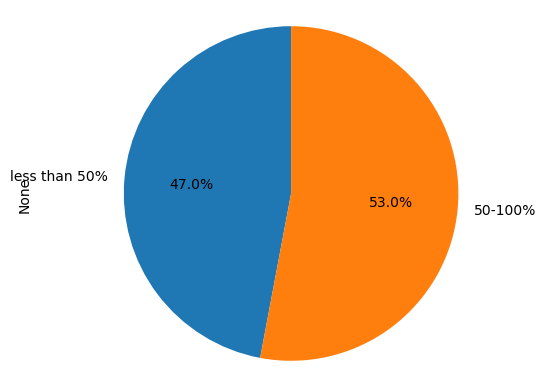

In [44]:
train['bins'] = pd.cut(train['Bad Dept'],bins=[0,0.10,1], labels=["less than 50%","50-100%"])
train.groupby(['bins']).size().plot(kind='pie',subplots=True,startangle=90, autopct='%1.1f%%')
plt.axis('equal')

plt.show()

###### 4) iv) Create Box and whisker plot and analyze the distribution for 2nd mortgage, home equity, good debt, and bad debt for different cities

In [45]:
train['city']

UID
267822       Hamilton
246444     South Bend
245683       Danville
279653       San Juan
247218      Manhattan
             ...     
279212          Coamo
277856      Blue Bell
233000        Weldona
287425    Colleyville
265371      Las Vegas
Name: city, Length: 27321, dtype: object

In [46]:
ham=train.loc[train['city']=='Hamilton']
man=train.loc[train['city']=='Manhattan']

In [47]:
box_city=pd.concat([ham,man])

In [48]:
box_city.head()

COUNTYID  STATEID        state state_ab      city          place  \
UID                                                                        
267822        53       36     New York       NY  Hamilton       Hamilton   
263797        21       34   New Jersey       NJ  Hamilton      Yardville   
270979        17       39         Ohio       OH  Hamilton  Hamilton City   
259028        95       28  Mississippi       MS  Hamilton       Hamilton   
270984        17       39         Ohio       OH  Hamilton      New Miami   

           type primary  zip_code  area_code  ...  female_age_stdev  \
UID                                           ...                     
267822     City   tract     13346        315  ...          22.51276   
263797     City   tract      8610        609  ...          24.05831   
270979  Village   tract     45015        513  ...          22.66500   
259028      CDP   tract     39746        662  ...          22.79602   
270984  Village   tract     45013        513  ...          24.55724   

        female_age_sample_weight  female_age_samples  pct_own  married  \
UID                                                                      
267822                 685.33845              2618.0  0.79046  0.57851   
263797                 732.58443              3124.0  0.64400  0.56377   
270979                 565.32725              2528.0  0.61278  0.47397   
259028                 483.01311              1954.0  0.83241  0.58678   
270984                 682.81171              2912.0  0.63194  0.55697   

        married_snp  separated  divorced  Bad Dept           bins  
UID                                                                
267822      0.01882    0.01240   0.08770   0.09408  less than 50%  
263797      0.01980    0.00990   0.04892   0.18071        50-100%  
270979      0.04419    0.02663   0.13741   0.15005        50-100%  
259028      0.01052    0.00000   0.11721   0.02130  less than 50%  
270984      0.01322    0.00000   0.15209   0.15651        50-100%  

[5 rows x 79 columns]

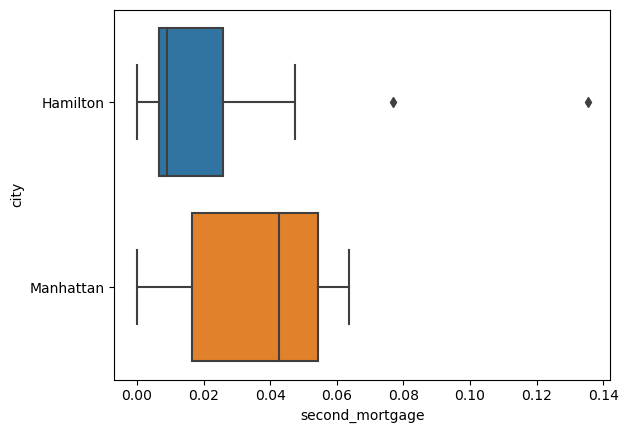

In [49]:
sns.boxplot(data=box_city,x='second_mortgage',y='city')
plt.show()

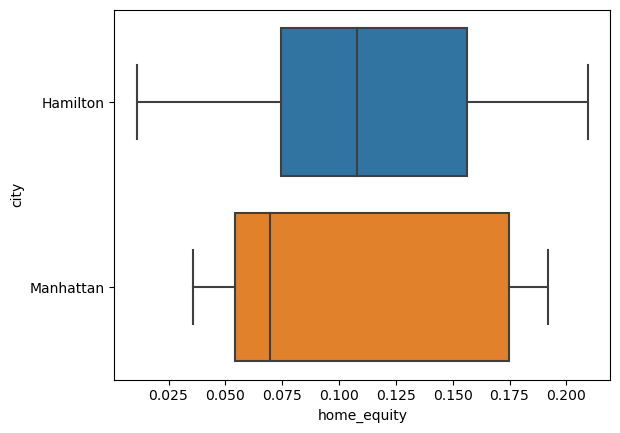

In [50]:
sns.boxplot(data=box_city,x='home_equity',y='city')
plt.show()

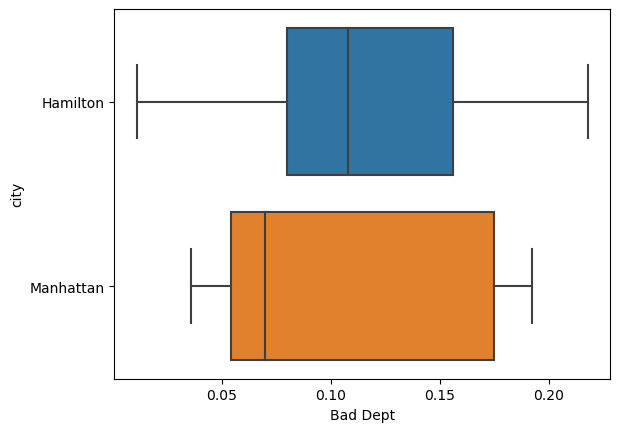

In [51]:
sns.boxplot(data=box_city,x='Bad Dept',y='city')
plt.show()

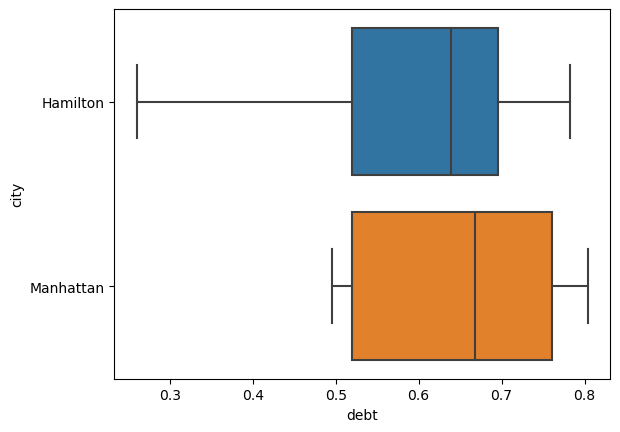

In [52]:
sns.boxplot(data=box_city,x='debt',y='city')
plt.show()

###### 4) v) Create a collated income distribution chart for family income, house hold income, and remaining income

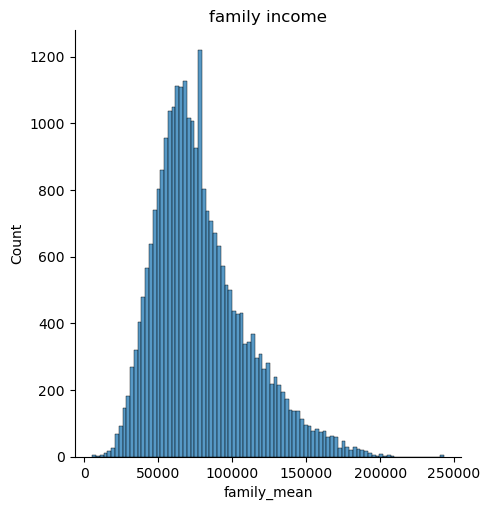

In [53]:
sns.displot(train['family_mean'])
plt.title('family income')
plt.show()

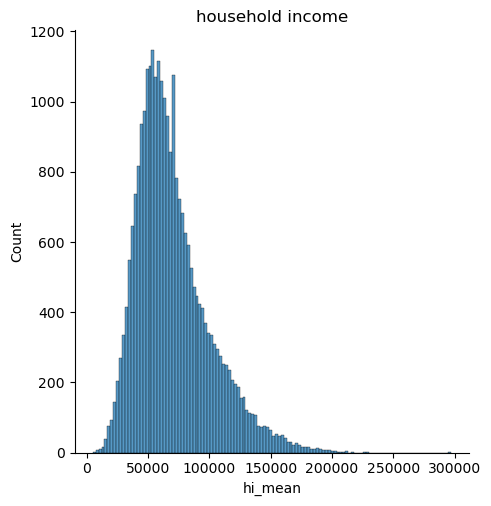

In [54]:
sns.displot(train['hi_mean'])
plt.title('household income')
plt.show()

In [55]:
train['rem_income']=train['family_mean']-train['hi_mean']
train['rem_income']

UID
267822     4868.86384
246444     8738.17744
245683    10319.83114
279653     7668.01017
247218    22219.26930
             ...     
279212     2373.47596
277856     -993.01490
233000     8988.31921
287425     1638.56660
265371     3237.89124
Name: rem_income, Length: 27321, dtype: float64

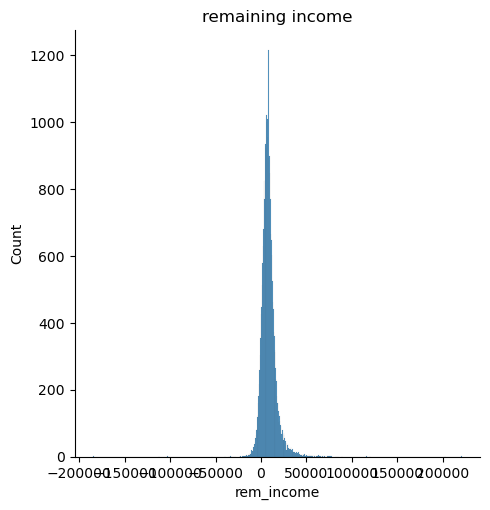

In [56]:
sns.displot(train['rem_income'])
plt.title('remaining income')
plt.show()

####  5) Perform EDA and come out with insights into population density and age. You may have to derive new fields (make sure to weight averages for accurate measurements): 

###### 5) i)Use pop and ALand variables to create a new field called population density

In [57]:
train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

<AxesSubplot:xlabel='pop', ylabel='Density'>

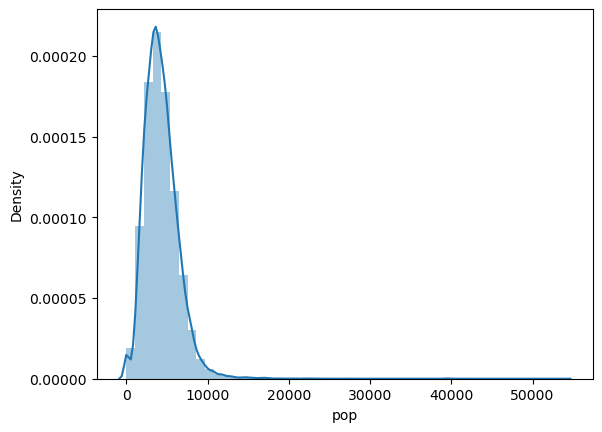

In [58]:
# subplot
sns.distplot(train['pop'])

<AxesSubplot:xlabel='male_pop', ylabel='Density'>

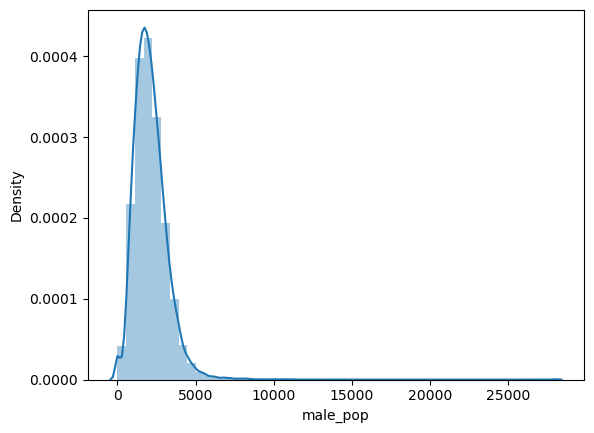

In [59]:
sns.distplot(train['male_pop'])

<AxesSubplot:xlabel='female_pop', ylabel='Density'>

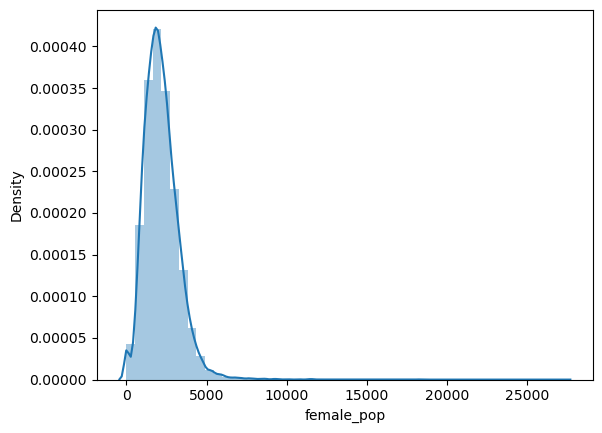

In [60]:
sns.distplot(train['female_pop'])

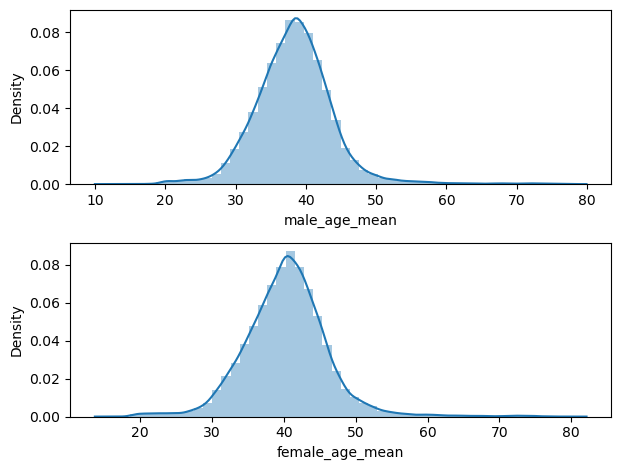

In [61]:
fig,(ax1,ax2)=plt.subplots(2,1)
plt.subplots_adjust(wspace=0.8,hspace=0.9)
sns.distplot(train['male_age_mean'],ax=ax1)
sns.distplot(train['female_age_mean'],ax=ax2)
plt.tight_layout()
plt.show()

In [62]:
train['pop_density']=train['pop']/train['ALand']
train['pop_density']

UID
267822    0.000026
246444    0.001687
245683    0.000099
279653    0.002442
247218    0.002207
            ...   
279212    0.002650
277856    0.000818
233000    0.000002
287425    0.000619
265371    0.000478
Name: pop_density, Length: 27321, dtype: float64

In [63]:
test['pop_density']=test['pop']/test['ALand']
test['pop_density']

UID
255504    0.001260
252676    0.000257
276314    0.000015
248614    0.000005
286865    0.000452
            ...   
238088    0.000061
242811    0.008241
250127    0.001415
241096    0.000537
287763    0.002069
Name: pop_density, Length: 11709, dtype: float64

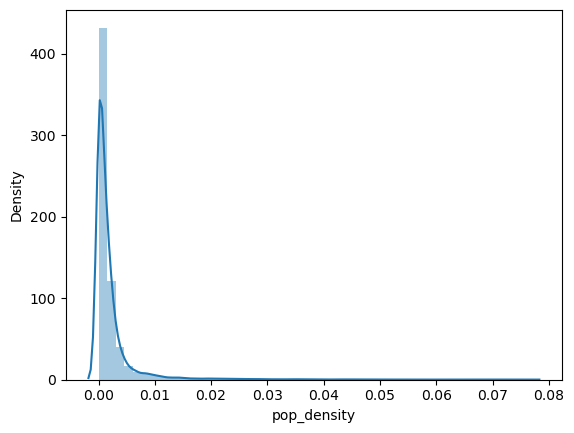

In [64]:
# check population density
sns.distplot(train['pop_density'])
plt.show()

###### 5) ii) Use male_age_median, female_age_median, male_pop, and female_pop to create a new field called median age

In [65]:
train['age_median']=(train['male_age_median']+train['female_age_median'])/2
train['age_median']

UID
267822    44.666665
246444    34.791665
245683    41.833330
279653    49.750000
247218    22.000000
            ...    
279212    40.916670
277856    39.166665
233000    44.166665
287425    45.041670
265371    31.166665
Name: age_median, Length: 27321, dtype: float64

In [66]:
test['age_median']=(test['male_age_median']+test['female_age_median'])/2
test['age_median']

UID
255504    30.791665
252676    46.375000
276314    43.208335
248614    45.500000
286865    43.208335
            ...    
238088    57.541665
242811    31.333330
250127    39.291670
241096    44.208335
287763    35.208335
Name: age_median, Length: 11709, dtype: float64

###### 5) iii) Visualize the findings using appropriate chart type

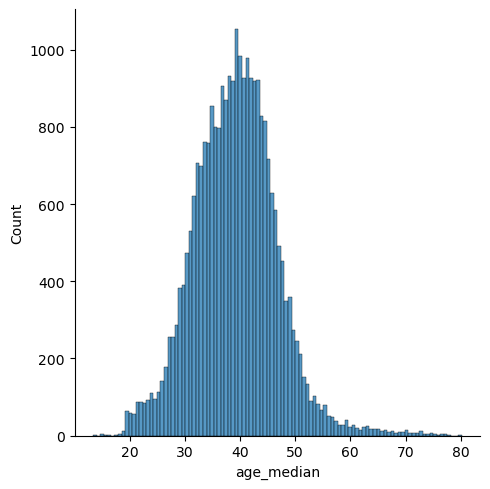

In [67]:
sns.displot(train['age_median'])
plt.show()

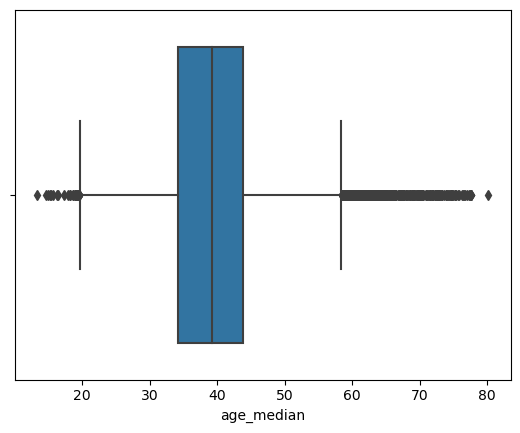

In [68]:
sns.boxplot(train['age_median'])
plt.show()

#### 6) Create bins for population into a new variable by selecting appropriate class interval so that the number of categories don’t exceed 5 for the ease of analysis.

In [69]:
train['pop']

UID
267822     5230
246444     2633
245683     6881
279653     2700
247218     5637
          ...  
279212     1847
277856     4155
233000     2829
287425    11542
265371     3726
Name: pop, Length: 27321, dtype: int64

In [70]:
train['pop_bins']=pd.cut(train['pop'],bins=5,
                         labels=['very low','low','medium','high','very high'])


In [71]:
train['pop_bins'].value_counts()

very low     27058
low            246
medium           9
high             7
very high        1
Name: pop_bins, dtype: int64

In [72]:
train[['pop','pop_bins']].head()

pop  pop_bins
UID                   
267822  5230  very low
246444  2633  very low
245683  6881  very low
279653  2700  very low
247218  5637  very low

In [73]:
train['pop'].describe()

count    27321.000000
mean      4316.032685
std       2169.226173
min          0.000000
25%       2885.000000
50%       4042.000000
75%       5430.000000
max      53812.000000
Name: pop, dtype: float64

<AxesSubplot:>

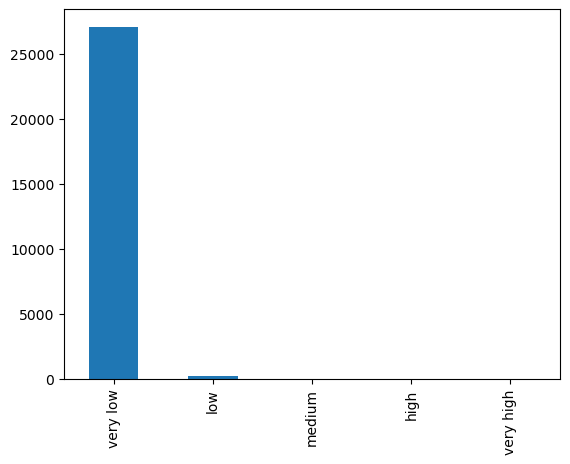

In [74]:
train['pop_bins'].value_counts().plot(kind='bar')

###### 6) i) Analyze the married, separated, and divorced population for these population brackets

In [75]:
train.groupby(by='pop_bins')[['married','separated','divorced']].count()

married  separated  divorced
pop_bins                               
very low     27058      27058     27058
low            246        246       246
medium           9          9         9
high             7          7         7
very high        1          1         1

In [76]:
train.groupby(by='pop_bins')[['married','separated','divorced']].sum()

married  separated     divorced
pop_bins                                      
very low   13733.22489  517.52126  2719.430721
low          143.88385    3.89480    18.535600
medium         5.90163    0.04503     0.593340
high           3.52351    0.05699     0.273210
very high      0.73474    0.00405     0.030360

In [77]:
train.groupby(by='pop_bins')[['married','separated','divorced']].agg(['sum','mean','median','count'])

married                             separated            \
                   sum      mean    median  count        sum      mean   
pop_bins                                                                 
very low   13733.22489  0.507548  0.524680  27058  517.52126  0.019126   
low          143.88385  0.584894  0.593135    246    3.89480  0.015833   
medium         5.90163  0.655737  0.618710      9    0.04503  0.005003   
high           3.52351  0.503359  0.335660      7    0.05699  0.008141   
very high      0.73474  0.734740  0.734740      1    0.00405  0.004050   

                               divorced                             
             median  count          sum      mean    median  count  
pop_bins                                                            
very low   0.013650  27058  2719.430721  0.100504  0.096020  27058  
low        0.011195    246    18.535600  0.075348  0.070045    246  
medium     0.004120      9     0.593340  0.065927  0.064890      9  
high       0.002500      7     0.273210  0.039030  0.010320      7  
very high  0.004050      1     0.030360  0.030360  0.030360      1

###### 6) iii) Visualize using appropriate chart type

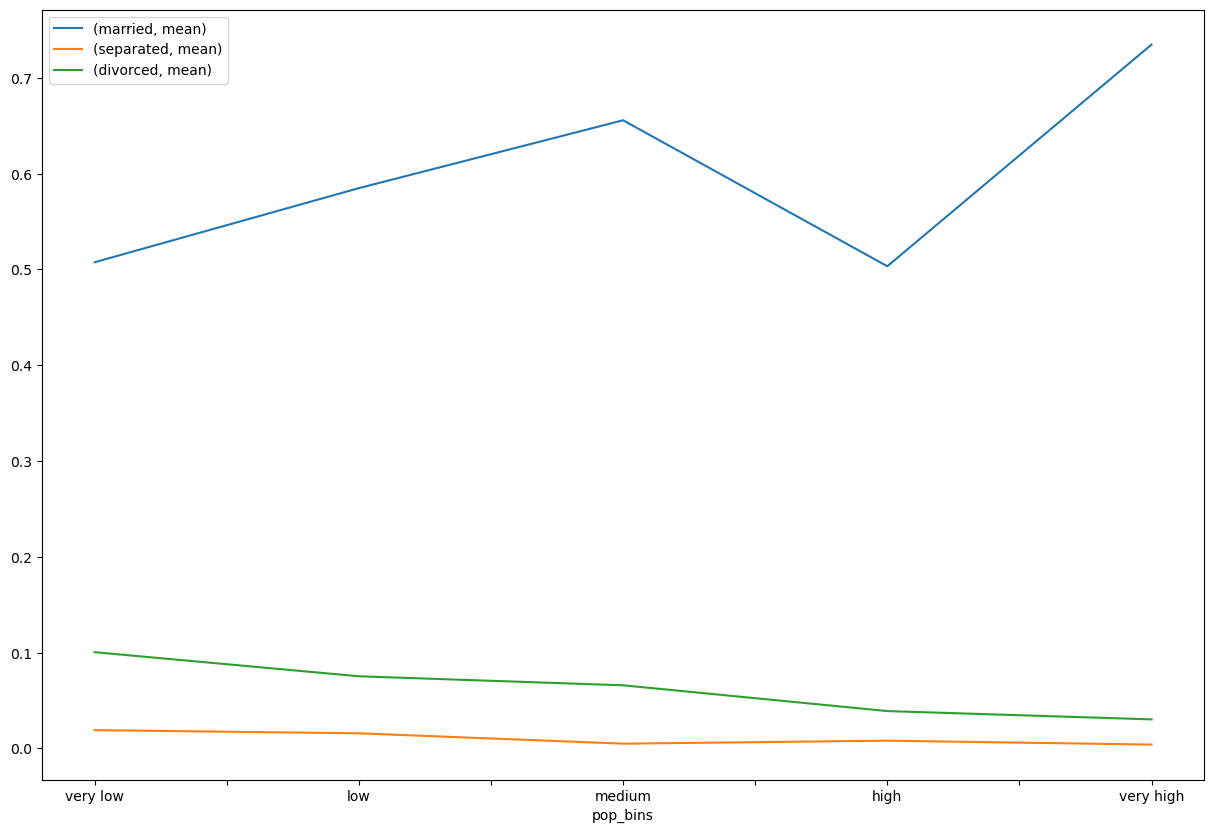

In [78]:
train.groupby(by='pop_bins')[['married','separated','divorced']].agg(['mean']).plot(figsize=(15,10))
plt.legend(loc='best')

#### 7) Please detail your observations for rent as a percentage of income at an overall level, and for different states.

In [79]:
train.columns

Index(['COUNTYID', 'STATEID', 'state', 'state_ab', 'city', 'place', 'type',
       'primary', 'zip_code', 'area_code', 'lat', 'lng', 'ALand', 'AWater',
       'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 

In [80]:
rent_state_mean=train.groupby(by='state')[['rent_mean']].agg(['mean'])

In [81]:
rent_state_mean

rent_mean
                             mean
state                            
Alabama                774.004927
Alaska                1185.763570
Arizona               1097.753511
Arkansas               720.918575
California            1471.133857
Colorado              1198.191514
Connecticut           1317.100534
Delaware              1127.309811
District of Columbia  1417.097934
Florida               1141.758549
Georgia                964.575973
Hawaii                1710.629412
Idaho                  800.486650
Illinois              1034.887921
Indiana                810.910355
Iowa                   737.246152
Kansas                 831.215856
Kentucky               742.199763
Louisiana              846.375506
Maine                  829.941899
Maryland              1412.009565
Massachusetts         1211.811159
Michigan               928.123200
Minnesota              957.376502
Mississippi            738.111770
Missouri               829.011192
Montana                776.337306
Nebraska               835.165893
Nevada                1128.641766
New Hampshire         1083.090073
New Jersey            1379.709933
New Mexico             853.611858
New York              1248.850743
North Carolina         885.593430
North Dakota           771.423137
Ohio                   820.004760
Oklahoma               777.702422
Oregon                1024.616948
Pennsylvania           949.580140
Puerto Rico            550.079459
Rhode Island          1039.482069
South Carolina         859.919160
South Dakota           685.325569
Tennessee              856.649930
Texas                  977.074993
Utah                  1068.930520
Vermont                937.119939
Virginia              1305.707687
Washington            1126.649264
West Virginia          667.193267
Wisconsin              841.670190
Wyoming                861.395327

In [82]:
income_state_mean=train.groupby(by='state')[['family_mean']].agg(['mean'])

In [83]:
income_state_mean

family_mean
                               mean
state                              
Alabama                67030.064213
Alaska                 92136.545109
Arizona                73328.238798
Arkansas               64765.377850
California             87655.470820
Colorado               88562.685927
Connecticut           104228.444232
Delaware               87190.491455
District of Columbia  107372.316925
Florida                72392.036712
Georgia                73293.253917
Hawaii                 93868.294406
Idaho                  66949.755112
Illinois               82003.366879
Indiana                67454.691127
Iowa                   74167.787915
Kansas                 75116.621886
Kentucky               67059.304023
Louisiana              69604.195926
Maine                  71091.495286
Maryland              101240.173302
Massachusetts          98422.128406
Michigan               72703.187186
Minnesota              86574.932719
Mississippi            59390.509230
Missouri               71040.100130
Montana                71958.709652
Nebraska               76535.726611
Nevada                 74048.793893
New Hampshire          90639.014349
New Jersey            100870.167344
New Mexico             69229.674498
New York               86667.260999
North Carolina         72792.145812
North Dakota           82925.457953
Ohio                   71926.694403
Oklahoma               66860.468732
Oregon                 77314.751840
Pennsylvania           79785.479442
Puerto Rico            36350.509782
Rhode Island           84562.442450
South Carolina         67942.453662
South Dakota           74553.497414
Tennessee              69723.043948
Texas                  75749.512713
Utah                   81028.412116
Vermont                79801.478013
Virginia               92930.324644
Washington             84379.671338
West Virginia          64522.201637
Wisconsin              75224.104310
Wyoming                79868.957886

In [84]:
# calculate rent percentage
rent_percent=rent_state_mean['rent_mean']/income_state_mean['family_mean']
rent_percent

mean
state                         
Alabama               0.011547
Alaska                0.012870
Arizona               0.014970
Arkansas              0.011131
California            0.016783
Colorado              0.013529
Connecticut           0.012637
Delaware              0.012929
District of Columbia  0.013198
Florida               0.015772
Georgia               0.013161
Hawaii                0.018224
Idaho                 0.011957
Illinois              0.012620
Indiana               0.012022
Iowa                  0.009940
Kansas                0.011066
Kentucky              0.011068
Louisiana             0.012160
Maine                 0.011674
Maryland              0.013947
Massachusetts         0.012312
Michigan              0.012766
Minnesota             0.011058
Mississippi           0.012428
Missouri              0.011670
Montana               0.010789
Nebraska              0.010912
Nevada                0.015242
New Hampshire         0.011949
New Jersey            0.013678
New Mexico            0.012330
New York              0.014410
North Carolina        0.012166
North Dakota          0.009303
Ohio                  0.011401
Oklahoma              0.011632
Oregon                0.013253
Pennsylvania          0.011902
Puerto Rico           0.015133
Rhode Island          0.012292
South Carolina        0.012657
South Dakota          0.009192
Tennessee             0.012286
Texas                 0.012899
Utah                  0.013192
Vermont               0.011743
Virginia              0.014050
Washington            0.013352
West Virginia         0.010341
Wisconsin             0.011189
Wyoming               0.010785

#### 8) Perform correlation analysis for all the relevant variables by creating a heatmap. Describe your findings.

In [85]:
df_num=train.select_dtypes(exclude='object')
df_num.shape

(27321, 77)

In [86]:
df_num.columns

Index(['COUNTYID', 'STATEID', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_female', 'male_age_mean',
       'male_age_median', '

In [87]:
fs=['COUNTYID', 'STATEID','ALand','pop', 'male_pop', 'female_pop','rent_mean','hi_mean','family_mean','hc_mortgage_mean','hc_mean',
    'home_equity_second_mortgage','home_equity','debt','second_mortgage_cdf', 'home_equity_cdf','debt_cdf','Bad Dept',
    'rem_income','pop_density', 'age_median']

In [88]:
df_num=df_num[fs]

In [89]:
df_num.corr()

COUNTYID   STATEID     ALand       pop  male_pop  \
COUNTYID                     1.000000  0.224549  0.015469 -0.002662 -0.002615   
STATEID                      0.224549  1.000000 -0.017275 -0.036599 -0.040351   
ALand                        0.015469 -0.017275  1.000000 -0.033743 -0.023061   
pop                         -0.002662 -0.036599 -0.033743  1.000000  0.978774   
male_pop                    -0.002615 -0.040351 -0.023061  0.978774  1.000000   
female_pop                  -0.002594 -0.031221 -0.043092  0.978263  0.915000   
rent_mean                   -0.099668 -0.215943 -0.067169  0.160590  0.156952   
hi_mean                     -0.078694 -0.085679 -0.028435  0.166913  0.166467   
family_mean                 -0.075688 -0.071612 -0.027897  0.128173  0.125614   
hc_mortgage_mean            -0.139581 -0.167274 -0.056334  0.110659  0.106709   
hc_mean                     -0.090427 -0.014471 -0.056723  0.051515  0.040595   
home_equity_second_mortgage -0.029628 -0.099340 -0.041688  0.079506  0.074326   
home_equity                 -0.123939 -0.145301 -0.079494  0.099352  0.092078   
debt                        -0.086231 -0.160532 -0.115591  0.231013  0.213543   
second_mortgage_cdf          0.056789  0.118136  0.047083 -0.145983 -0.136138   
home_equity_cdf              0.144019  0.157823  0.087180 -0.125210 -0.113348   
debt_cdf                     0.084046  0.161254  0.106314 -0.242106 -0.226852   
Bad Dept                    -0.125892 -0.151007 -0.079618  0.099489  0.092085   
rem_income                  -0.000033  0.038811 -0.001982 -0.116411 -0.124075   
pop_density                 -0.080509 -0.013671 -0.044934  0.033740  0.020651   
age_median                  -0.063521 -0.017172  0.042532 -0.162499 -0.166810   

                             female_pop  rent_mean   hi_mean  family_mean  \
COUNTYID                      -0.002594  -0.099668 -0.078694    -0.075688   
STATEID                       -0.031221  -0.215943 -0.085679    -0.071612   
ALand                         -0.043092  -0.067169 -0.028435    -0.027897   
pop                            0.978263   0.160590  0.166913     0.128173   
male_pop                       0.915000   0.156952  0.166467     0.125614   
female_pop                     1.000000   0.157331  0.160152     0.125223   
rent_mean                      0.157331   1.000000  0.753920     0.701019   
hi_mean                        0.160152   0.753920  1.000000     0.960624   
family_mean                    0.125223   0.701019  0.960624     1.000000   
hc_mortgage_mean               0.109874   0.750081  0.763128     0.759805   
hc_mean                        0.060337   0.594499  0.675090     0.687674   
home_equity_second_mortgage    0.081312   0.126409  0.079805     0.055928   
home_equity                    0.102418   0.408837  0.469863     0.458973   
debt                           0.238706   0.432481  0.418408     0.378871   
second_mortgage_cdf           -0.149636  -0.184876 -0.227101    -0.203395   
home_equity_cdf               -0.131802  -0.426632 -0.512780    -0.505808   
debt_cdf                      -0.247077  -0.457416 -0.426063    -0.379535   
Bad Dept                       0.102680   0.412618  0.467399     0.455988   
rem_income                    -0.103626  -0.086429 -0.003822     0.274179   
pop_density                    0.045526   0.156928 -0.041501    -0.040661   
age_median                    -0.151114   0.071445  0.262170     0.300215   

                             hc_mortgage_mean  ...  \
COUNTYID                            -0.139581  ...   
STATEID                             -0.167274  ...   
ALand                               -0.056334  ...   
pop                                  0.110659  ...   
male_pop                             0.106709  ...   
female_pop                           0.109874  ...   
rent_mean                            0.750081  ...   
hi_mean                              0.763128  ...   
family_mean                          0.759805  ...   
hc_mortgage

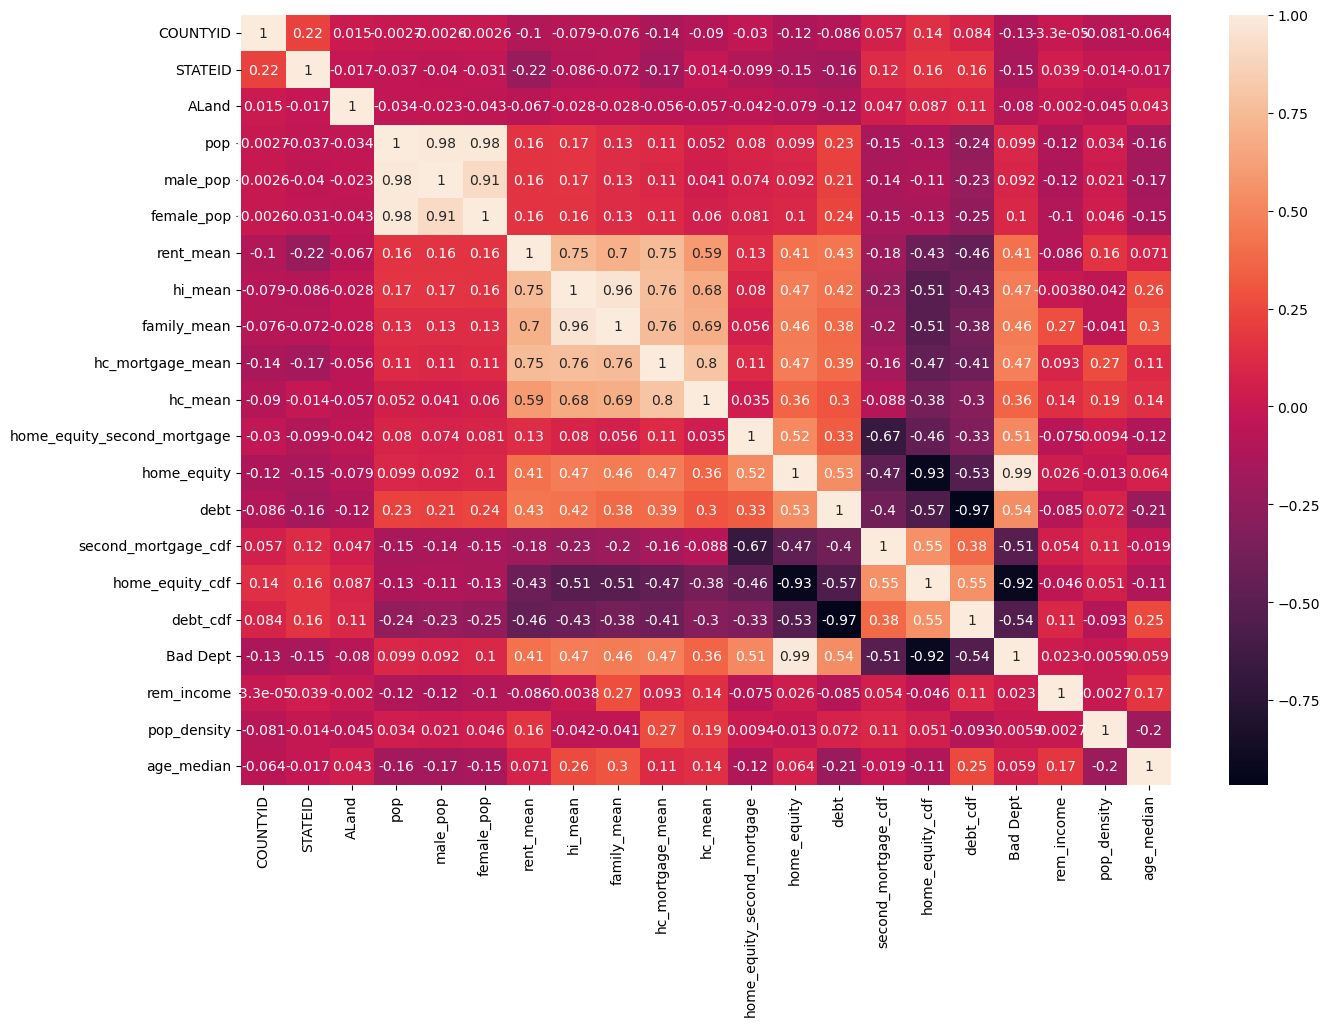

In [90]:
plt.figure(figsize=(15,10))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

In [91]:
train.corr().nlargest(10,'hc_mortgage_mean')

COUNTYID   STATEID  zip_code  area_code       lat  \
hc_mortgage_mean   -0.139581 -0.167274 -0.016521   0.042561  0.097747   
hc_mortgage_median -0.137223 -0.163141 -0.014076   0.040420  0.098932   
hc_mortgage_stdev  -0.121160 -0.161088 -0.017648   0.037865  0.062863   
hc_mean            -0.090427 -0.014471 -0.216220   0.032167  0.217543   
hc_median          -0.090027 -0.006556 -0.218867   0.032809  0.216665   
hi_stdev           -0.076096 -0.102172 -0.008421   0.003285  0.107065   
hi_mean            -0.078694 -0.085679  0.001909   0.018253  0.128503   
family_mean        -0.075688 -0.071612 -0.024658   0.001865  0.151403   
rent_mean          -0.099668 -0.215943  0.073246   0.042648 -0.004272   
family_median      -0.073908 -0.062530 -0.027690   0.002106  0.150768   

                         lng     ALand    AWater       pop  male_pop  ...  \
hc_mortgage_mean   -0.097289 -0.056334 -0.009922  0.110659  0.106709  ...   
hc_mortgage_median -0.098047 -0.057950 -0.010905  0.106507  0.102745  ...   
hc_mortgage_stdev  -0.081923 -0.015402  0.005098  0.082230  0.079537  ...   
hc_mean             0.151952 -0.056723 -0.010573  0.051515  0.040595  ...   
hc_median           0.157308 -0.058138 -0.010907  0.050546  0.039426  ...   
hi_stdev           -0.047004 -0.018233  0.000892  0.126602  0.120234  ...   
hi_mean            -0.057359 -0.028435 -0.002166  0.166913  0.166467  ...   
family_mean        -0.027104 -0.027897 -0.002058  0.128173  0.125614  ...   
rent_mean          -0.168511 -0.067169 -0.009534  0.160590  0.156952  ...   
family_median      -0.022271 -0.029353 -0.002436  0.124272  0.121873  ...   

                    female_age_samples   pct_own   married  married_snp  \
hc_mortgage_mean              0.111564  0.067828  0.222728    -0.082061   
hc_mortgage_median            0.107336  0.057242  0.207688    -0.074806   
hc_mortgage_stdev             0.082654  0.150366  0.273710    -0.112352   
hc_mean                       0.061084  0.102150  0.199810    -0.116247   
hc_median                     0.060374  0.089392  0.185114    -0.110327   
hi_stdev                      0.128452  0.380186  0.444157    -0.253367   
hi_mean                       0.162200  0.481066  0.530892    -0.291916   
family_mean                   0.127229  0.450961  0.480095    -0.314925   
rent_mean                     0.159766  0.140249  0.255671    -0.106256   
family_median                 0.123292  0.451739  0.473053    -0.310826   

                    separated  divorced  Bad Dept  rem_income  pop_density  \
hc_mortgage_mean    -0.178431 -0.403366  0.472699    0.093272     0.266100   
hc_mortgage_median  -0.170123 -0.397459  0.462500    0.075261     0.269361   
hc_mortgage_stdev   -0.180225 -0.296222  0.381657    0.171537     0.171223   
hc_mean             -0.167693 -0.336902  0.360709    0.138378     0.190739   
hc_median           -0.160633 -0.328496  0.345310    0.125853     0.188590   
hi_stdev            -0.282948 -0.343387  0.414195    0.200060     0.011956   
hi_mean             -0.316511 -0.390061  0.467399   -0.003822    -0.041501   
family_mean         -0.323433 -0.353274  0.455988    0.274179    -0.040661   
rent_mean           -0.188108 -0.374508  0.412618   -0.086429     0.156928   
family_median       -0.314345 -0.346997  0.442937    0.242823    -0.040476   

                    age_median  
hc_mortgage_mean      0.114831  
hc_mortgage_median    0.095051  
hc_mortgage_stdev     0.252015  
hc_mean               0.142000  
hc_median             0.123160  
hi_stdev              0.295498  
hi_mean               0.262170  
family_mean           0.300215  
rent_mean             0.071445  
family_median         0.280827  

[10 rows x 75 columns]

### Project Task: Week 2
### Data Pre-processing:

###### The economic multivariate data has a significant number of measured variables. The goal is to find where the measured variables depend on a number of smaller unobserved common factors or latent variables. 

###### Each variable is assumed to be dependent upon a linear combination of the common factors, and the coefficients are known as loadings. Each measured variable also includes a component due to independent random variability, known as “specific variance” because it is specific to one variable. Obtain the common factors and then plot the loadings. Use factor analysis to find latent variables in our dataset and gain insight into the linear relationships in the data. 

###### Following are the list of latent variables:

Highschool graduation rates

Median population age

Second mortgage statistics

Percent own

Bad debt expense

In [92]:
from factor_analyzer import FactorAnalyzer

In [93]:
train.select_dtypes(exclude=['object','category']).columns

Index(['COUNTYID', 'STATEID', 'zip_code', 'area_code', 'lat', 'lng', 'ALand',
       'AWater', 'pop', 'male_pop', 'female_pop', 'rent_mean', 'rent_median',
       'rent_stdev', 'rent_sample_weight', 'rent_samples', 'rent_gt_10',
       'rent_gt_15', 'rent_gt_20', 'rent_gt_25', 'rent_gt_30', 'rent_gt_35',
       'rent_gt_40', 'rent_gt_50', 'universe_samples', 'used_samples',
       'hi_mean', 'hi_median', 'hi_stdev', 'hi_sample_weight', 'hi_samples',
       'family_mean', 'family_median', 'family_stdev', 'family_sample_weight',
       'family_samples', 'hc_mortgage_mean', 'hc_mortgage_median',
       'hc_mortgage_stdev', 'hc_mortgage_sample_weight', 'hc_mortgage_samples',
       'hc_mean', 'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', 'hs_degree',
       'hs_degree_male', 'hs_degree_female', 'male_age_mean',
       'male_age_median', '

In [94]:
fa=FactorAnalyzer(n_factors=5)

In [95]:
fa.fit_transform(train.select_dtypes(exclude=['object','category']))

array([[-3.45912941e-01,  5.43700878e-01,  9.36939205e-01,
        -1.10467901e+00,  5.57643863e-01],
       [-1.02617505e+00, -5.07869099e-01, -4.04200161e-01,
         5.64227832e-02,  2.39193000e-01],
       [-3.22457388e-02,  1.26071294e+00,  7.46715135e-01,
        -4.55069523e-01, -7.01574161e-01],
       ...,
       [-1.26108721e-01, -5.92123592e-01,  7.39962138e-01,
        -1.36942383e+00, -2.64705806e-01],
       [ 2.58191914e+00,  3.10963541e+00,  1.52442275e+00,
        -1.42657091e-03, -1.13867365e+00],
       [-2.92509747e-01, -1.00743023e-01, -1.30254112e+00,
         1.87192347e-01, -1.88637224e-01]])

### Data Modeling :

#### Build a linear Regression model to predict the total monthly expenditure for home mortgages loan. 

###### a) Run a model at a Nation level. If the accuracy levels and R square are not satisfactory proceed to below step.

###### b) Run another model at State level. There are 52 states in USA.

###### c) Keep below considerations while building a linear regression model:

###### Variables should have significant impact on predicting Monthly mortgage and owner costs

###### Utilize all predictor variable to start with initial hypothesis

###### R square of 60 percent and above should be achieved

###### Ensure Multi-collinearity does not exist in dependent variables

###### Test if predicted variable is normally distributed

In [96]:
train

COUNTYID  STATEID         state state_ab         city  \
UID                                                             
267822        53       36      New York       NY     Hamilton   
246444       141       18       Indiana       IN   South Bend   
245683        63       18       Indiana       IN     Danville   
279653       127       72   Puerto Rico       PR     San Juan   
247218       161       20        Kansas       KS    Manhattan   
...          ...      ...           ...      ...          ...   
279212        43       72   Puerto Rico       PR        Coamo   
277856        91       42  Pennsylvania       PA    Blue Bell   
233000        87        8      Colorado       CO      Weldona   
287425       439       48         Texas       TX  Colleyville   
265371         3       32        Nevada       NV    Las Vegas   

                   place     type primary  zip_code  area_code  ...  married  \
UID                                                             ...            
267822          Hamilton     City   tract     13346        315  ...  0.57851   
246444          Roseland     City   tract     46616        574  ...  0.34886   
245683          Danville     City   tract     46122        317  ...  0.64745   
279653          Guaynabo    Urban   tract       927        787  ...  0.47257   
247218    Manhattan City     City   tract     66502        785  ...  0.12356   
...                  ...      ...     ...       ...        ...  ...      ...   
279212             Coamo    Urban   tract       769        787  ...  0.24603   
277856         Blue Bell  Borough   tract     19422        215  ...  0.61127   
233000      Saddle Ridge     City   tract     80653        970  ...  0.70451   
287425  Colleyville City     Town   tract     76034        817  ...  0.75503   
265371          Paradise     City   tract     89123        702  ...  0.34426   

        married_snp  separated  divorced  Bad Dept           bins  \
UID                                                                 
267822      0.01882    0.01240   0.08770   0.09408  less than 50%   
246444      0.01426    0.01426   0.09030   0.04274  less than 50%   
245683      0.02830    0.01607   0.10657   0.09512  less than 50%   
279653      0.02021    0.02021   0.10106   0.01086  less than 50%   
247218      0.00000    0.00000   0.03109   0.05426  less than 50%   
...             ...        ...       ...       ...            ...   
279212      0.03042    0.02249   0.14683   0.00000            NaN   
277856      0.05003    0.02473   0.04888   0.20908        50-100%   
233000      0.01386    0.00520   0.07712   0.07857  less than 50%   
287425      0.02287    0.00915   0.05261   0.14305        50-100%   
265371      0.03825    0.03005   0.13320   0.18362        50-100%   

         rem_income  pop_density  age_median  pop_bins  
UID                                                     
267822   4868.86384     0.000026   44.666665  very low  
246444   8738.17744     0.001687   34.791665  very low  
245683  10319.83114     0.000099   41.833330  very low  
279653   7668.01017     0.002442   49.750000  very low  
247218  22219.26930     0.002207   22.000000  very low  
...             ...          ...         ...       ...  
279212   2373.47596     0.002650   40.916670  very low  
277856   -993.01490     0.000818   39.166665  very low  
233000   8988.31921     0.000002   44.166665  very low  
287425   1638.56660     0.000619   45.041670       low  
265371   3237.89124     0.000478   31.166665  very low  

[27321 rows x 83 columns]

In [97]:
train['type']

UID
267822       City
246444       City
245683       City
279653      Urban
247218       City
           ...   
279212      Urban
277856    Borough
233000       City
287425       Town
265371       City
Name: type, Length: 27321, dtype: object

In [98]:
train['type'].value_counts()

City       15237
Town        3666
CDP         3658
Village     3216
Borough     1226
Urban        318
Name: type, dtype: int64

In [99]:
# convert type column into numerical date
train.replace({'City':1,'Town':2,'CDP':3,'Village':4,'Borough':5,'Urban':6},inplace =True)

In [100]:
train['type'].value_counts()

1    15237
2     3666
3     3658
4     3216
5     1226
6      318
Name: type, dtype: int64

In [101]:
test.replace({'City':1,'Town':2,'CDP':3,'Village':4,'Borough':5,'Urban':6},inplace =True)

In [102]:
test['type'].value_counts()

1    6481
2    1634
3    1558
4    1356
5     509
6     171
Name: type, dtype: int64

In [103]:
input_cols=['COUNTYID', 'STATEID','type','pop','rent_mean','hi_mean','family_mean',
            'second_mortgage', 'home_equity', 'debt','hs_degree','pct_own', 'married', 
            'married_snp', 'separated', 'divorced','pop_density', 'age_median']

In [104]:
xtrain=train[input_cols]
xtrain

COUNTYID  STATEID  type    pop   rent_mean       hi_mean  \
UID                                                                
267822        53       36     1   5230   769.38638   63125.28406   
246444       141       18     1   2633   804.87924   41931.92593   
245683        63       18     1   6881   742.77365   84942.68317   
279653       127       72     6   2700   803.42018   48733.67116   
247218       161       20     1   5637   938.56493   31834.15466   
...          ...      ...   ...    ...         ...           ...   
279212        43       72     6   1847   439.42839   18515.67021   
277856        91       42     5   4155  1813.19253  119889.08320   
233000        87        8     1   2829   849.39107   79890.25113   
287425       439       48     2  11542  1972.45746  165510.27110   
265371         3       32     1   3726   949.84199   51648.18703   

         family_mean  second_mortgage  home_equity     debt  hs_degree  \
UID                                                                      
267822   67994.14790          0.02077      0.08919  0.52963    0.89288   
246444   50670.10337          0.02222      0.04274  0.60855    0.90487   
245683   95262.51431          0.00000      0.09512  0.73484    0.94288   
279653   56401.68133          0.01086      0.01086  0.52714    0.91500   
247218   54053.42396          0.05426      0.05426  0.51938    1.00000   
...              ...              ...          ...      ...        ...   
279212   20889.14617          0.00000      0.00000  0.11694    0.60155   
277856  118896.06830          0.02112      0.19641  0.65364    0.95737   
233000   88878.57034          0.02024      0.07857  0.58095    0.93555   
287425  167148.83770          0.07550      0.12556  0.65722    0.98540   
265371   54886.07827          0.01412      0.18362  0.65537    0.87370   

        pct_own  married  married_snp  separated  divorced  pop_density  \
UID                                                                       
267822  0.79046  0.57851      0.01882    0.01240   0.08770     0.000026   
246444  0.52483  0.34886      0.01426    0.01426   0.09030     0.001687   
245683  0.85331  0.64745      0.02830    0.01607   0.10657     0.000099   
279653  0.65037  0.47257      0.02021    0.02021   0.10106     0.002442   
247218  0.13046  0.12356      0.00000    0.00000   0.03109     0.002207   
...         ...      ...          ...        ...       ...          ...   
279212  0.60422  0.24603      0.03042    0.02249   0.14683     0.002650   
277856  0.68072  0.61127      0.05003    0.02473   0.04888     0.000818   
233000  0.78508  0.70451      0.01386    0.00520   0.07712     0.000002   
287425  0.93970  0.75503      0.02287    0.00915   0.05261     0.000619   
265371  0.27912  0.34426      0.03825    0.03005   0.13320     0.000478   

        age_median  
UID                 
267822   44.666665  
246444   34.791665  
245683   41.833330  
279653   49.750000  
247218   22.000000  
...            ...  
279212   40.916670  
277856   39.166665  
233000   44.166665  
287425   45.041670  
265371   31.166665  

[27321 rows x 18 columns]

In [105]:
xtest=test[input_cols]
xtest

COUNTYID  STATEID  type   pop   rent_mean       hi_mean   family_mean  \
UID                                                                             
255504       163       26     3  3417   858.57169   48899.52121   53802.87122   
252676         1       23     1  3796   832.68625   72335.33234   85642.22095   
276314        15       42     5  3944   816.00639   58501.15901   65694.06582   
248614       231       21     1  2508   418.68937   38237.55059   44156.38709   
286865       355       48     2  6230  1031.63763  114456.07790  123527.02420   
...          ...      ...   ...   ...         ...           ...           ...   
238088       105       12     1  5611  1458.82449   57723.48180   70786.81912   
242811        31       17     4  2695   700.53513   35249.76522   38912.54156   
250127         9       25     1  7392  1069.70567   89549.15374   99484.96572   
241096        27       19     1  5945   696.93368   57877.26387   75066.29009   
287763       453       48     2  4117   950.09294   58006.33817   54913.24441   

        second_mortgage  home_equity     debt  hs_degree  pct_own  married  \
UID                                                                          
255504          0.06443      0.07651  0.63624    0.91047  0.70252  0.28217   
252676          0.01175      0.14375  0.64755    0.94290  0.85128  0.64221   
276314          0.01316      0.06497  0.45395    0.89238  0.81897  0.59961   
248614          0.00995      0.01741  0.41915    0.60908  0.84609  0.56953   
286865          0.00000      0.03440  0.63188    0.86297  0.79077  0.57620   
...                 ...          ...      ...        ...      ...      ...   
238088          0.03619      0.04044  0.43593    0.92097  0.93121  0.65969   
242811          0.05909      0.08182  0.63182    0.54890  0.33122  0.42882   
250127          0.02727      0.13545  0.74273    0.94057  0.84372  0.50269   
241096          0.03570      0.07967  0.65546    0.91407  0.83330  0.66699   
287763          0.00000      0.05042  0.63866    0.78685  0.52587  0.51922   

        married_snp  separated  divorced  pop_density  age_median  
UID                                                                
255504      0.05910    0.03813   0.14299     0.001260   30.791665  
252676      0.02338    0.00000   0.13377     0.000257   46.375000  
276314      0.01746    0.01358   0.10026     0.000015   43.208335  
248614      0.05492    0.04694   0.12489     0.000005   45.500000  
286865      0.01726    0.00588   0.16379     0.000452   43.208335  
...             ...        ...       ...          ...         ...  
238088      0.02135    0.02135   0.08780     0.000061   57.541665  
242811      0.07781    0.02829   0.05305     0.008241   31.333330  
250127      0.00108    0.00108   0.07294     0.001415   39.291670  
241096      0.02738    0.00000   0.04694     0.000537   44.208335  
287763      0.08066    0.02520   0.10586     0.002069   35.208335  

[11709 rows x 18 columns]

In [106]:
ytrain=train['hc_mortgage_mean']
ytrain

UID
267822    1414.80295
246444     864.41390
245683    1506.06758
279653    1175.28642
247218    1192.58759
             ...    
279212     770.11560
277856    2210.84055
233000    1671.07908
287425    3074.83088
265371    1455.42340
Name: hc_mortgage_mean, Length: 27321, dtype: float64

In [107]:
ytest=test['hc_mortgage_mean']
ytest

UID
255504    1139.24548
252676    1533.25988
276314    1254.54462
248614     862.65763
286865    1996.41425
             ...    
238088    1269.83033
242811    1406.83478
250127    1791.63902
241096    1182.30365
287763    1364.17379
Name: hc_mortgage_mean, Length: 11709, dtype: float64

In [108]:
from sklearn.preprocessing import StandardScaler

In [109]:
sc=StandardScaler()

In [110]:
xtrainScale=sc.fit_transform(xtrain)

In [111]:
xtestScale=sc.fit_transform(xtest)

In [112]:
# apply linear regression model
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(xtrainScale,ytrain)

LinearRegression()

In [113]:
ypred=lr.predict(xtestScale)
ypred

array([ 989.91590848, 1496.23774948, 1122.6801078 , ..., 1817.52811073,
       1311.83448817, 1274.19897149])

In [114]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [115]:
print('Mean Squared Error :',np.sqrt(mean_squared_error(ytest,ypred)))

Mean Squared Error : 294.428701433839


In [116]:
print('R2 Score :',np.sqrt(r2_score(ytest,ypred)))

R2 Score : 0.8830619956303083


In [117]:
train['STATEID'].unique()

array([36, 18, 72, 20,  1, 48, 45,  6,  5, 24, 17, 19, 47, 32, 22,  8, 44,
       28, 34, 41,  4, 12, 55, 42, 37, 51, 26, 39, 40, 13, 16, 46, 27, 29,
       53, 56,  9, 54, 21, 25, 11, 15, 30,  2, 33, 49, 50, 31, 38, 35, 23,
       10], dtype=int64)

In [118]:
for i in [11,1,29]:
    print("State ID-",i)
    
    X_train_nation = train[train['COUNTYID'] == i][input_cols]
    y_train_nation = train[train['COUNTYID'] == i]['hc_mortgage_mean']
    
    X_test_nation = test[test['COUNTYID'] == i][input_cols]
    y_test_nation = test[test['COUNTYID'] == i]['hc_mortgage_mean']
    
    X_train_scaled_nation = sc.fit_transform(X_train_nation)
    X_test_scaled_nation = sc.fit_transform(X_test_nation)
    
    lr.fit(X_train_scaled_nation,y_train_nation)
    y_pred_nation = lr.predict(X_test_scaled_nation)
    
    print("Overall R2 score of linear regression model for state,",i,":-" ,r2_score(y_test_nation,y_pred_nation))
    print("Overall RMSE of linear regression model for state,",i,":-" ,np.sqrt(mean_squared_error(y_test_nation,y_pred_nation)))
    print("\n")

State ID- 11
Overall R2 score of linear regression model for state, 11 :- 0.7878307344957062
Overall RMSE of linear regression model for state, 11 :- 217.82598461627254


State ID- 1
Overall R2 score of linear regression model for state, 1 :- 0.831704528063316
Overall RMSE of linear regression model for state, 1 :- 290.04701143367475


State ID- 29
Overall R2 score of linear regression model for state, 29 :- 0.7301140022145465
Overall RMSE of linear regression model for state, 29 :- 259.17954187803485




###### Data Reporting:

Create a dashboard in tableau by choosing appropriate chart types and metrics useful for the business. The dashboard must entail the following:

Box plot of distribution of average rent by type of place (village, urban, town, etc.).

Pie charts to show overall debt and bad debt.

Explore the top 2,500 locations where the percentage of households with a second mortgage is the highest and percent ownership is above 10 percent. Visualize using geo-map.

Heat map for correlation matrix.

Pie chart to show the population distribution across different types of places (village, urban, town etc.).